In [5]:
from fast3d import Conv3d
from torch.autograd import profiler
import torch
from unet.RSUNet import RSUNet

from network_profile.api import t_profile_net, t_profile_theory, t_profile_timings,_summarize_theory, _fix_timing_index, dataframe_readble
from network_profile.helpers import DEFAULT_LTYPE
from network_profile.computation_timing import *

# from network_profile.computation_count import *
from network_profile.plotting import *
from network_profile.memory_profile import log_memory

In [6]:
model = RSUNet(12,3).cuda()

In [7]:
inp = torch.randn(1,1,80,160,160).cuda()

In [8]:
data = t_profile_net(model,inp)

cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 1, 80, 160, 160]), cin:1, cout:32, kernel:(1, 5, 5), stride:(1, 2, 2)
padding:(0, 2, 2), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 40, 40, 40]), cin:32, cout:64, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:to

/home/weihao_zhuang/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2497: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 1, 80, 160, 160]), cin:1, cout:32, kernel:(1, 5, 5), stride:(1, 2, 2)
padding:(0, 2, 2), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 80, 80, 80]), cin:32, cout:32, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:torch.Size([1, 32, 40, 40, 40]), cin:32, cout:64, kernel:(3, 3, 3), stride:(1, 1, 1)
padding:(1, 1, 1), dilation:1, groups:1, bias:None
cannot find autotvm kernel for parameters:
inp_shape:to

In [12]:
dataframe_readble(data).head()

,layer,fw_operation,bw_operation,input_size,output_size,MAC,fwd_node name,fwd_node time,fwd_kernel name,fwd_kernel time,bwd_node name,bwd_node time,bwd_kernel name,bwd_kernel time,fwd_efficient,bwd_efficient
Conv_0,Conv3d_0,409.60 M,819.20 M,"(1, 1, 80, 160, 160)","(1, 32, 80, 80, 80)",18.43 M,conv3d,1.14 m,conv3d,0.00113971,SlowConvDilated3DBackward,1.66 m,SlowConvDilated3DBackward,0.00166194,359.39 G,492.92 G
Conv_1,Conv3d_1,14.16 G,28.31 G,"(1, 32, 80, 80, 80)","(1, 32, 80, 80, 80)",32.80 M,conv3d,11.13 m,conv3d,0.011134,SlowConvDilated3DBackward,34.63 m,SlowConvDilated3DBackward,0.0346317,1.27 T,817.50 G
BatchNorm3d_0,BatchNorm3d_0,16.38 M,16.38 M,"(1, 32, 80, 80, 80)","(1, 32, 80, 80, 80)",32.77 M,batch_norm,881.66 µ,batch_norm,0.000881663,NativeBatchNormBackward,1.11 m,NativeBatchNormBackward,0.00111412,18.58 G,14.71 G
Conv_2,Conv3d_2,14.16 G,28.31 G,"(1, 32, 80, 80, 80)","(1, 32, 80, 80, 80)",32.80 M,conv3d,11.07 m,conv3d,0.0110715,SlowConvDilated3DBackward,34.58 m,SlowConvDilated3DBackward,0.0345805,1.28 T,818.71 G
BatchNorm3d_1,BatchNorm3d_1,16.38 M,16.38 M,"(1, 32, 80, 80, 80)","(1, 32, 80, 80, 80)",32.77 M,batch_norm,878.59 µ,batch_norm,0.000878592,NativeBatchNormBackward,1.10 m,NativeBatchNormBackward,0.00110081,18.65 G,14.88 G


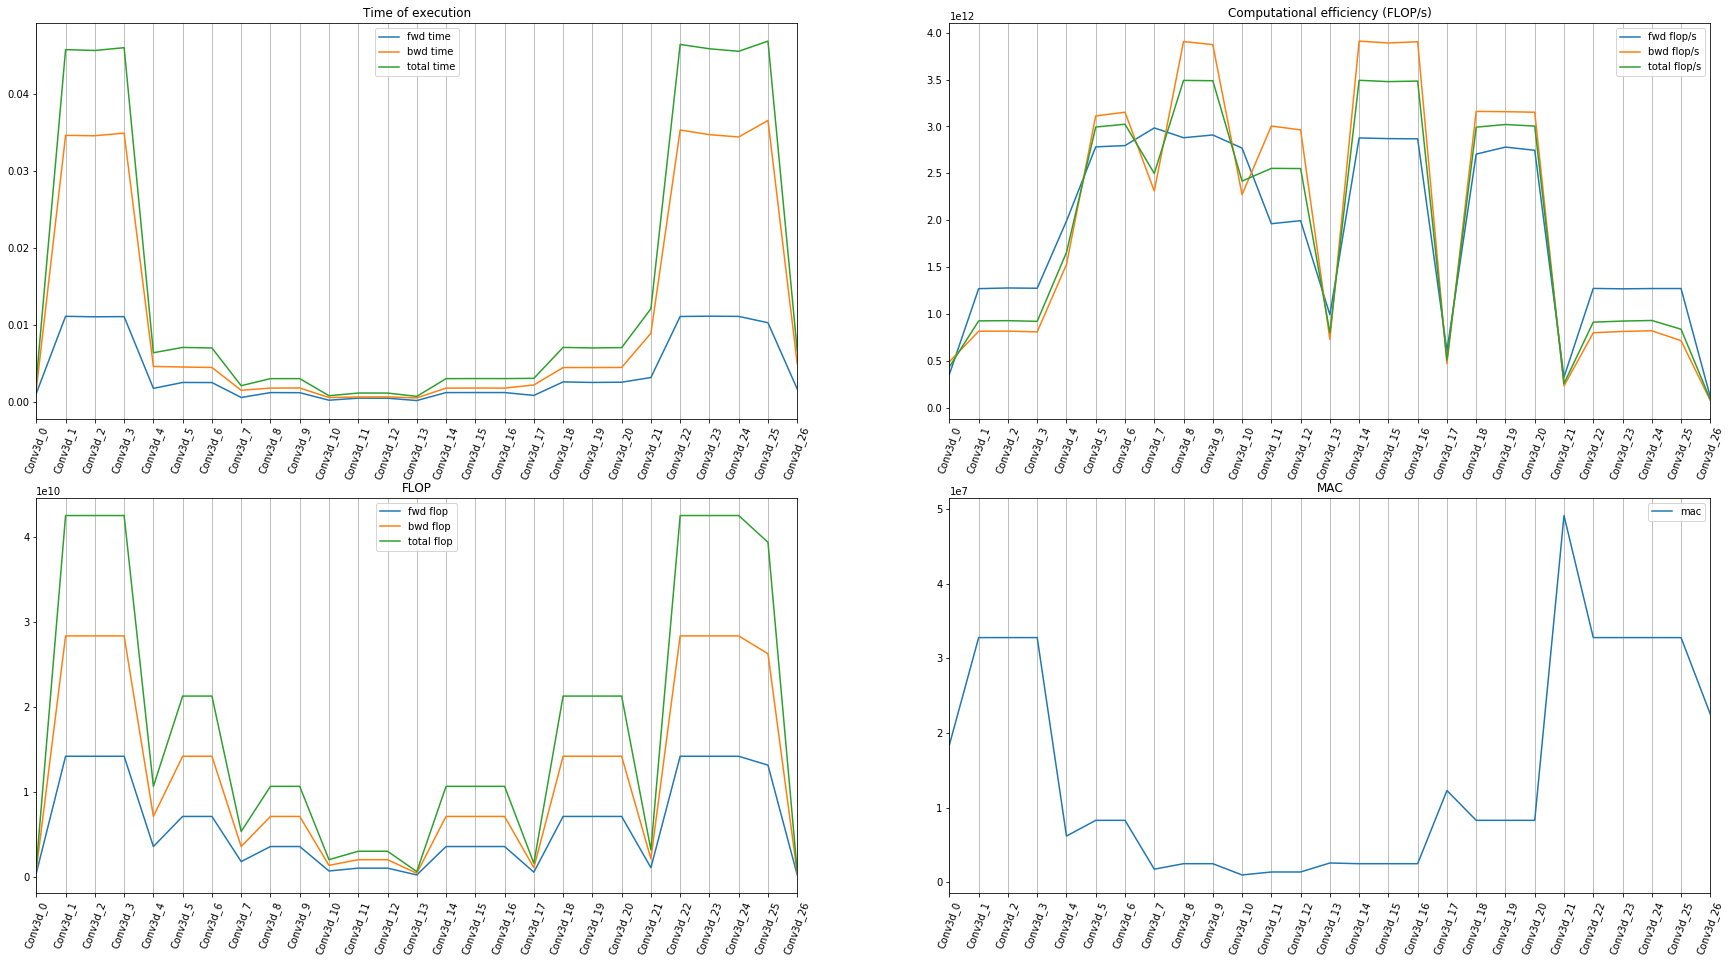

In [10]:
data_conv = data[data["fwd_node name"].isin(["conv3d","MyConv3d"])]
plot_time_FLOPs_FLOP_MAC(data_conv)